# Problem Description

**under construction**

*Let us understand **how to create a baseline model** with the use of a time-series example.* 

*Suppose our company sells licences of a software product and we want to understand how many licences we will sell in the future. We can use time-series models like ARIMA as well as machine-learning approaches (see unit 3 of the course book) for that purpose.*

*We should always compare our model approaches with simple, so-called baseline models. Perhaps we observe, that all our sophisticated model approaches do not show better performance than simple baseline approaches. Then we should cease our effort, go a step back and take a closer look at our explanatory variables (the features of the model).*

# Preambel

In [1]:
# Common imports
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 
import pickle # we have to import a pickle file
import os 
from datetime import timedelta, date

# maximum number of columns
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Time-Series Data Creation

In [2]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2018, 1, 1)
end_dt   = date(2020, 8, 9)

date_vec = [];
for dt in daterange(start_dt, end_dt):
    date_vec.append(dt) 
    
salesByDate = pd.DataFrame.from_dict({'date': date_vec, 'sales':np.nan})

In [3]:
salesByDate.date = pd.to_datetime(salesByDate.date)

salesByDate['weekday']  = salesByDate['date'].dt.weekday
salesByDate['monthday'] = salesByDate['date'].dt.day
salesByDate['month'] = salesByDate['date'].dt.month
salesByDate['year']  = salesByDate['date'].dt.year

In [4]:
np.random.seed(42)
basic_sales = 500;
salesByDate['sales'] = np.ceil(np.cos((salesByDate['weekday']-1)/6) * basic_sales + 0.3*(salesByDate['year']-2018+1)*basic_sales - (salesByDate['month']-7) + np.random.randint(100,1000, salesByDate.shape[0]))

In [5]:
salesByDate.head(10)

,date,sales,weekday,monthday,month,year
0,2018-01-01,852.0,0,1,1,2018
1,2018-01-02,1191.0,1,2,1,2018
2,2018-01-03,1610.0,2,3,1,2018
3,2018-01-04,999.0,3,4,1,2018
4,2018-01-05,801.0,4,5,1,2018
5,2018-01-06,720.0,5,6,1,2018
6,2018-01-07,1293.0,6,7,1,2018
7,2018-01-08,770.0,0,8,1,2018
8,2018-01-09,1370.0,1,9,1,2018
9,2018-01-10,871.0,2,10,1,2018


# Time-Series Plots

Here is how the number of daily sales looks like

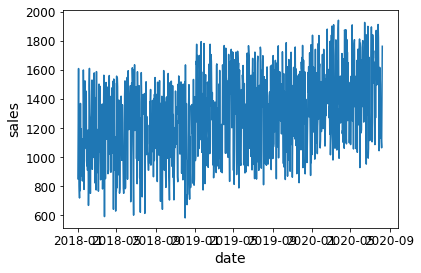

In [6]:
import seaborn as sns
ax = sns.lineplot(x = "date", y = "sales", data=salesByDate)

Here the dependence on feature variables is shown:

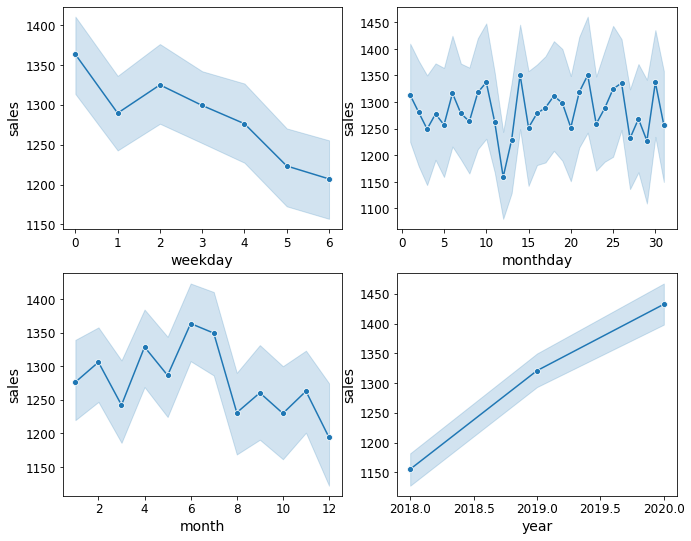

In [7]:
plt.figure(figsize=(11, 9))

i = 0
for col in salesByDate.columns[2:]:
    i+=1
    plt.subplot(2, 2, i)
    ax = sns.lineplot(x=col, y="sales", marker='o', data=salesByDate)
plt.show()
#ax = sns.lineplot(x="month", y="sales", data=salesByDate)

# Benchmark Models

After setting up the artificial dataset, there is now room for creativity. 

Which simple models (baseline models) can we create before starting with real modeling?

## Overall Mean Value

The simplest benchmark model is always to predict the mean/median for future days:

In [8]:
salesByDate['benchmark_mean'] = salesByDate['sales'].mean()

## Mean by month

In [9]:
calc = np.ceil(salesByDate.groupby('month')['sales'].mean()).to_frame('benchmark_mean_month').reset_index()
display(calc.head(3))

salesByDate = pd.merge(calc, salesByDate, on = 'month')
salesByDate

,month,benchmark_mean_month
0,1,1277.0
1,2,1307.0
2,3,1243.0


,month,benchmark_mean_month,date,sales,weekday,monthday,year,benchmark_mean
0,1,1277.0,2018-01-01,852.0,0,1,2018,1283.37605
1,1,1277.0,2018-01-02,1191.0,1,2,2018,1283.37605
2,1,1277.0,2018-01-03,1610.0,2,3,2018,1283.37605
3,1,1277.0,2018-01-04,999.0,3,4,2018,1283.37605
4,1,1277.0,2018-01-05,801.0,4,5,2018,1283.37605
...,...,...,...,...,...,...,...,...
947,12,1195.0,2019-12-27,1339.0,4,27,2019,1283.37605
948,12,1195.0,2019-12-28,1154.0,5,28,2019,1283.37605
949,12,1195.0,2019-12-29,875.0,6,29,2019,1283.37605
950,12,1195.0,2019-12-30,1773.0,0,30,2019,1283.37605


Now mean value by week, weekday...could be applied as well.

## Rolling Mean of Last Week

In [10]:
salesByDate["benchmark_MA_roll_8"] = salesByDate['sales'].rolling(window=8).mean()

In [11]:
salesByDate.head(8)

,month,benchmark_mean_month,date,sales,weekday,monthday,year,benchmark_mean,benchmark_MA_roll_8
0,1,1277.0,2018-01-01,852.0,0,1,2018,1283.37605,NaN
1,1,1277.0,2018-01-02,1191.0,1,2,2018,1283.37605,NaN
2,1,1277.0,2018-01-03,1610.0,2,3,2018,1283.37605,NaN
3,1,1277.0,2018-01-04,999.0,3,4,2018,1283.37605,NaN
4,1,1277.0,2018-01-05,801.0,4,5,2018,1283.37605,NaN
5,1,1277.0,2018-01-06,720.0,5,6,2018,1283.37605,NaN
6,1,1277.0,2018-01-07,1293.0,6,7,2018,1283.37605,NaN
7,1,1277.0,2018-01-08,770.0,0,8,2018,1283.37605,1029.5


## Comparing the benchmark models

In [12]:
def rms_error(true, pred):
    diff=(true-pred).dropna()
    return np.sqrt((diff**2).mean())

In [13]:
for col in ['benchmark_mean', 'benchmark_mean_month', 'benchmark_MA_roll_8']:
    print('BENCHMARK {} : {}'.format(col, rms_error(salesByDate['sales'], salesByDate[col])))

BENCHMARK benchmark_mean : 290.32276911526213
BENCHMARK benchmark_mean_month : 286.12580421964066
BENCHMARK benchmark_MA_roll_8 : 253.0701491945658


Here we observe that the rolling mean benchmark model gives the best result, i.e. the error on the daily number of sales is around 250 licenses.

Now a more sophisticated model has to outperform these benchmark models. 

# Predictive Models

Here you can start with modeling the time-series data in order to outperform the simple benchmarks!